In [1]:
import os
import re
import csv

def parse_log_file(log_file_path):
    # Define patterns to search for the required metrics
    best_loss_pattern = r"best loss: ([\d.]+)"
    inflow_mae_pattern = r"INFLOW, MAE: ([\d.]+),"
    outflow_mae_pattern = r"OUTFLOW, MAE: ([\d.]+),"
    inflow_mape_pattern = r"INFLOW, MAE: [\d.]+, MAPE: ([\d.]+)%"
    outflow_mape_pattern = r"OUTFLOW, MAE: [\d.]+, MAPE: ([\d.]+)%"

    # Initialize variables to store the extracted values
    metrics = {'Best Loss': None, 'INFLOW MAE': None, 'OUTFLOW MAE': None, 'INFLOW MAPE': None, 'OUTFLOW MAPE': None}

    with open(log_file_path, 'r') as file:
        log_data = file.read()
        # Search and extract metrics from log data
        metrics['Best Loss'] = re.search(best_loss_pattern, log_data).group(1) if re.search(best_loss_pattern, log_data) else None
        metrics['INFLOW MAE'] = re.search(inflow_mae_pattern, log_data).group(1) if re.search(inflow_mae_pattern, log_data) else None
        metrics['OUTFLOW MAE'] = re.search(outflow_mae_pattern, log_data).group(1) if re.search(outflow_mae_pattern, log_data) else None
        metrics['INFLOW MAPE'] = re.search(inflow_mape_pattern, log_data).group(1) if re.search(inflow_mape_pattern, log_data) else None
        metrics['OUTFLOW MAPE'] = re.search(outflow_mape_pattern, log_data).group(1) if re.search(outflow_mape_pattern, log_data) else None

    return metrics

def process_dataset_directory(dataset_directory, output_csv_file):
    # Prepare the CSV file
    with open(output_csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Experiment Name', 'Best Loss', 'INFLOW MAE', 'OUTFLOW MAE', 'INFLOW MAPE', 'OUTFLOW MAPE'])

        # Walk through the dataset directory
        for root, dirs, files in os.walk(dataset_directory):
            for name in files:
                if name.endswith(".log"):
                    log_file_path = os.path.join(root, name)
                    print(log_file_path)
                    print(os.path.basename(os.path.dirname(os.path.dirname(log_file_path))) + "_" + os.path.basename(os.path.dirname(log_file_path))[-5:])
                    # experiment_name = os.path.basename(os.path.dirname(os.path.dirname(log_file_path)))  # Get the experiment name from the path
                    experiment_name = os.path.basename(os.path.dirname(os.path.dirname(log_file_path))) + "_" + os.path.basename(os.path.dirname(log_file_path))[:]  # Get the experiment name from the path
                    metrics = parse_log_file(log_file_path)
                    writer.writerow([log_file_path] + list(metrics.values()))

# Example usage
dataset = "NYCTaxi"
dataset_directory = fr"D:\omer\ST-SSL\experiments\{dataset}" # Adjust this path to your dataset directory
output_csv_file = fr"D:\omer\ST-SSL\experiments\{dataset}\metrics_{dataset}.csv"
process_dataset_directory(dataset_directory, output_csv_file)


D:\omer\ST-SSL\experiments\NYCTaxi\pred__seed=1\20240417-120828\run.log
pred__seed=1_20828
D:\omer\ST-SSL\experiments\NYCTaxi\pred__seed=1\20240417-120903\run.log
pred__seed=1_20903
D:\omer\ST-SSL\experiments\NYCTaxi\pred__seed=1\20240417-121023\run.log
pred__seed=1_21023
D:\omer\ST-SSL\experiments\NYCTaxi\pred__seed=1\20240417-121042\run.log
pred__seed=1_21042
D:\omer\ST-SSL\experiments\NYCTaxi\pred__seed=1\20240417-121104\run.log
pred__seed=1_21104
D:\omer\ST-SSL\experiments\NYCTaxi\pred__seed=1\20240417-121141\run.log
pred__seed=1_21141
D:\omer\ST-SSL\experiments\NYCTaxi\pred__seed=1\20240417-131600\run.log
pred__seed=1_31600
D:\omer\ST-SSL\experiments\NYCTaxi\pred__seed=1\20240417-131928\run.log
pred__seed=1_31928
D:\omer\ST-SSL\experiments\NYCTaxi\pred__seed=1\20240417-195334\run.log
pred__seed=1_95334
D:\omer\ST-SSL\experiments\NYCTaxi\pred__seed=1\20240419-102532\run.log
pred__seed=1_02532
D:\omer\ST-SSL\experiments\NYCTaxi\pred__seed=1\20240419-102733\run.log
pred__seed=1_02733

w.shape: (100, 17)


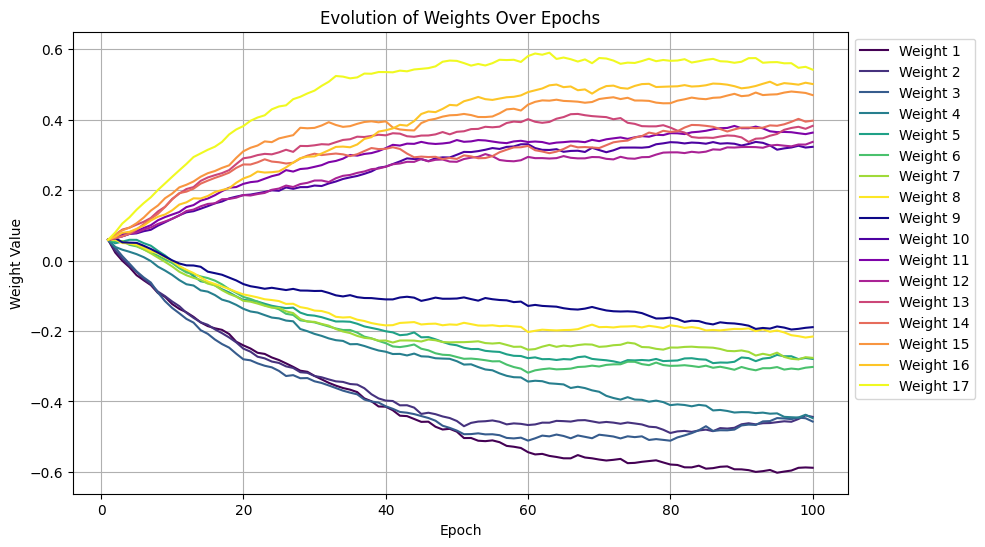

[[ 0.05882353  0.05882353  0.05882353 ...  0.05882353  0.05882353
   0.05882353]
 [ 0.0225598   0.02859065  0.03648046 ...  0.07330997  0.06758582
   0.07972822]
 [-0.00078421  0.00536352  0.01235156 ...  0.08553448  0.07881916
   0.10517579]
 ...
 [-0.5882668  -0.44975963 -0.4457183  ...  0.4777143   0.4990322
   0.54688096]
 [-0.5872217  -0.43960154 -0.4475972  ...  0.4755569   0.50457436
   0.5497056 ]
 [-0.5881307  -0.44376242 -0.45698807 ...  0.46945968  0.5008596
   0.54160786]]


In [28]:
import matplotlib.pyplot as plt
import numpy as np
# Function to load weights
def load_weights(epoch, directory="weight_data"):
    filename = os.path.join(directory, f"weights_epoch_{epoch}.npy")
    return np.load(filename)

# Example: Load and plot weights from epoch 20
# weights_epoch_20 = load_weights(20)
# filename = r"D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240701-120042\checking if backprop reaches unused weights due to softmax\learnable_weights_epoch_5.png.npy"
filename = r"D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240630-111124\fixed issue where only 1 weight was updating\learnable_weights_epoch_100.png.npy"
w=np.load(filename)
print(f"w.shape: {w.shape}")
import numpy as np
import matplotlib.pyplot as plt


epochs = np.arange(1, 101)  # Since you have 4 epochs, from 1 to 4
import matplotlib.cm as cm
colors_1 = cm.viridis(np.linspace(0, 1, w.shape[1] // 2))
colors_2 = cm.plasma(np.linspace(0, 1, w.shape[1] - w.shape[1] // 2))

plt.figure(figsize=(10, 6))

# Plot the first half of the weights with the first colormap
for i in range(w.shape[1] // 2):
    plt.plot(epochs, w[:, i], label=f'Weight {i+1}', color=colors_1[i])

# Plot the second half of the weights with the second colormap
for i in range(w.shape[1] // 2, w.shape[1]):
    plt.plot(epochs, w[:, i], label=f'Weight {i+1}', color=colors_2[i - w.shape[1] // 2])

plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Evolution of Weights Over Epochs')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moving legend outside the plot
plt.grid(True)
plt.show()
print(w)

In [34]:
import torch

my_list = list(range(17))
my_tensor = torch.tensor(my_list)
print(my_tensor)
print(my_tensor.shape)
my_tensor = my_tensor[-4:]
print(my_tensor)
print(my_tensor.shape)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
torch.Size([17])
tensor([13, 14, 15, 16])
torch.Size([4])
